
Balancing Data Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118320 entries, 0 to 118319
Data columns (total 9 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   GMT Time                                             0 non-null       float64
 1   System Price (ESO Outturn) - GB (£/MWh)              118275 non-null  float64
 2   NIV Outturn (+ve long) - GB (MW)                     118320 non-null  float64
 3   BM Bid Acceptances (total) - GB (MW)                 117768 non-null  float64
 4   BM Offer Acceptances (total) - GB (MW)               116849 non-null  float64
 5   Total BSAD Volume - Turn Up - GB (MW)                62465 non-null   float64
 6   Total BSAD Volume - Turn Down - GB (MW)              47406 non-null   float64
 7   Total BSAD Volume - Total - GB (MW)                  81271 non-null   float64
 8   Intraday Volume (EPEX Outturn

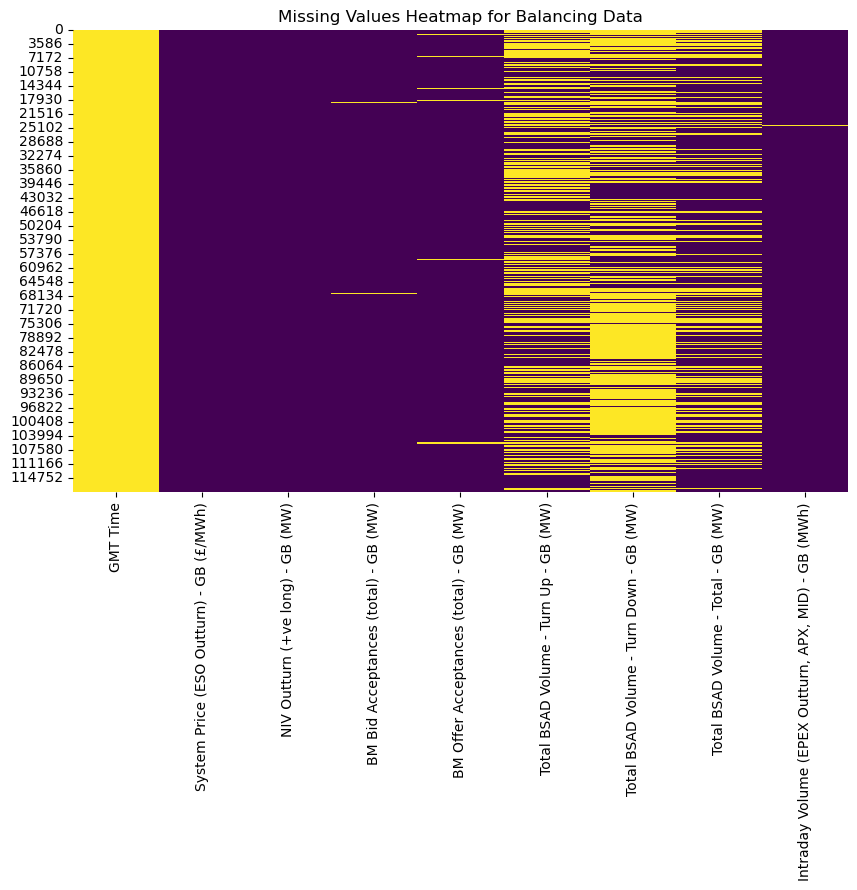

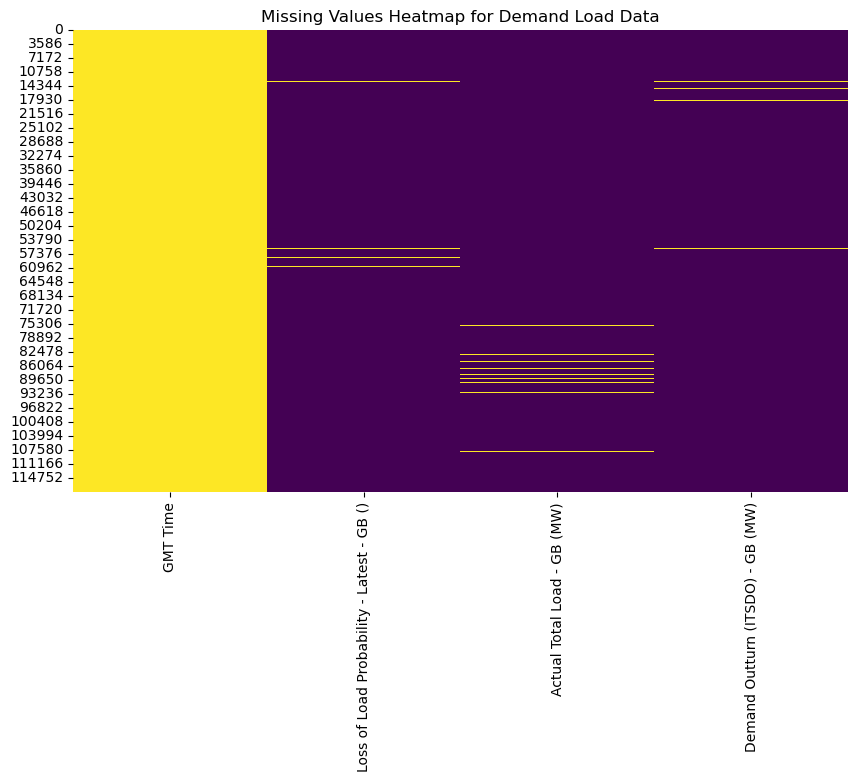

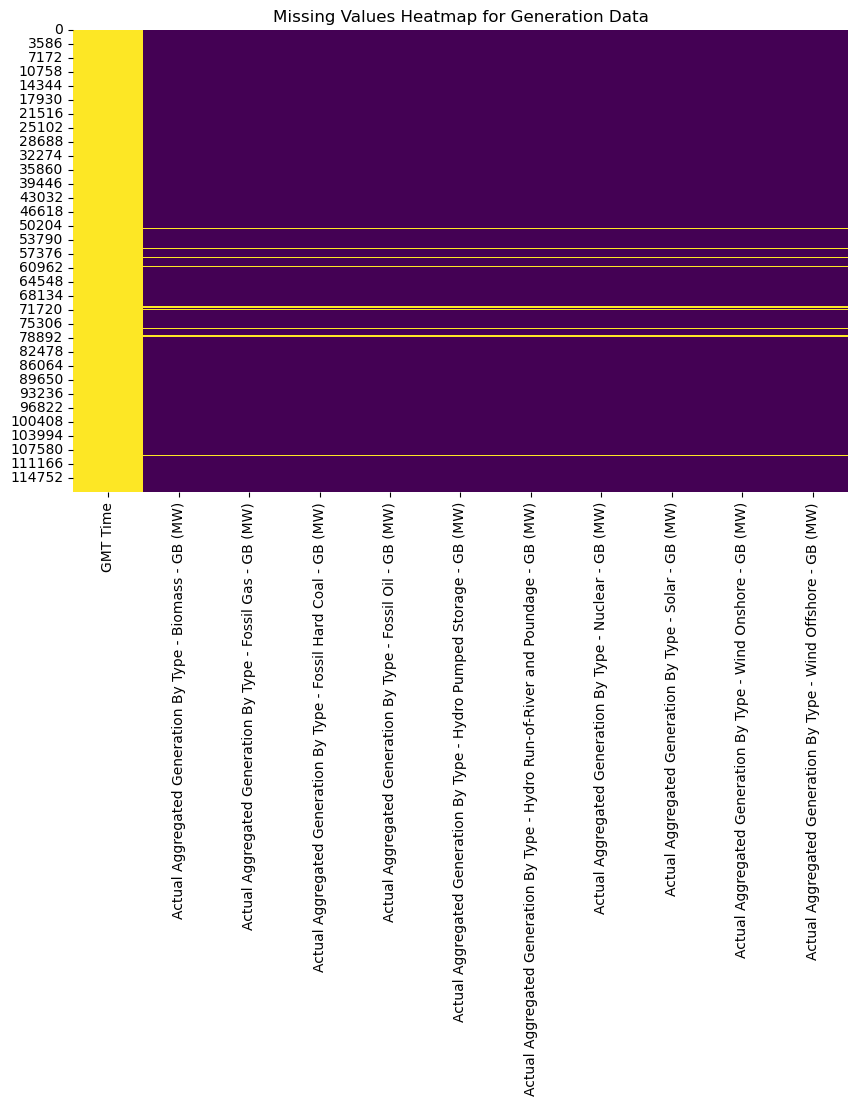

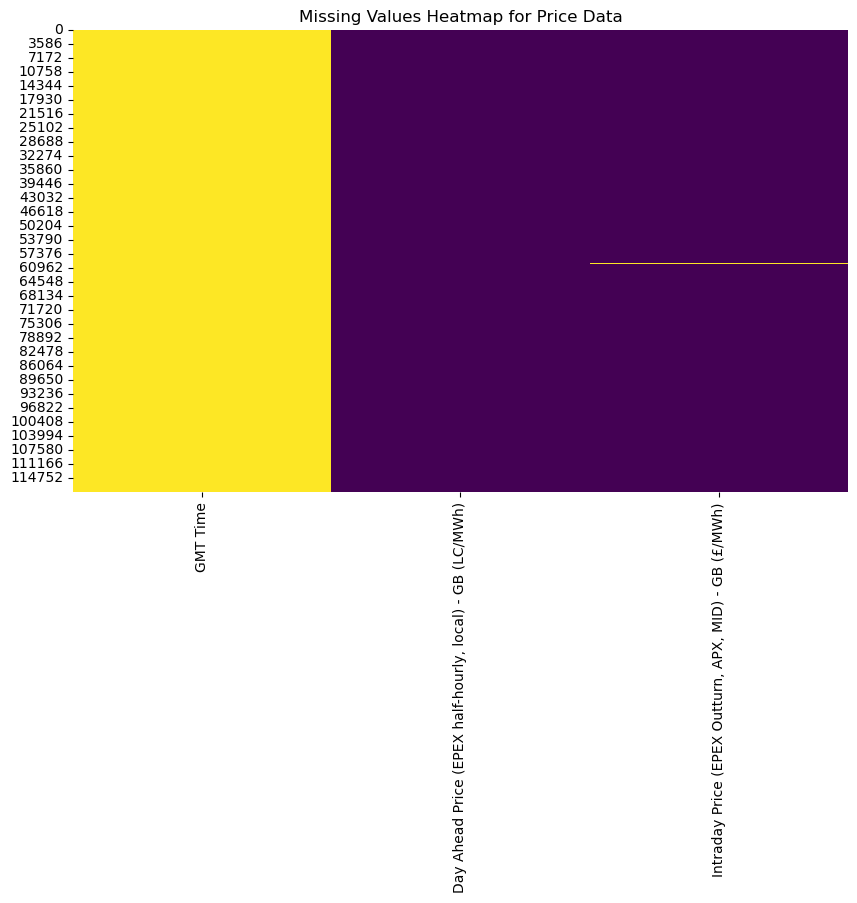

ValueError: Shape of passed values is (118320, 8), indices imply (118320, 9)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
balancing_data = pd.read_csv('../data/balancing_data.csv')
demand_load_data = pd.read_csv('../data/demand_load_data.csv')
generation_data = pd.read_csv('../data/generation_data.csv')
price_data = pd.read_csv('../data/price_data.csv')

# Convert object columns to numeric where possible (replace 'No Data Available' with NaN)
for df, name in zip([balancing_data, demand_load_data, generation_data, price_data], 
                    ['Balancing Data', 'Demand Load Data', 'Generation Data', 'Price Data']):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = pd.to_numeric(df[col].replace('No Data Available', np.nan), errors='coerce')

# Display initial information about the datasets
def initial_inspection(df, name):
    print(f"\n{name} Dataset:\n")
    print(df.info())
    print(df.describe())
    print(f"Missing Values in {name}:\n{df.isnull().sum()}")

# Initial inspection for each dataset
initial_inspection(balancing_data, 'Balancing Data')
initial_inspection(demand_load_data, 'Demand Load Data')
initial_inspection(generation_data, 'Generation Data')
initial_inspection(price_data, 'Price Data')

# Visualizing missing values
def visualize_missing_values(df, name):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title(f'Missing Values Heatmap for {name}')
    plt.show()

# Visualize missing values for each dataset
visualize_missing_values(balancing_data, 'Balancing Data')
visualize_missing_values(demand_load_data, 'Demand Load Data')
visualize_missing_values(generation_data, 'Generation Data')
visualize_missing_values(price_data, 'Price Data')

# Handling Missing Values
# Step 1: Impute missing numerical values using sophisticated methods
from sklearn.impute import KNNImputer

# KNN Imputer for numerical columns with missing values
def impute_missing_values(df, name):
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    if len(numerical_cols) > 0:
        knn_imputer = KNNImputer(n_neighbors=5)
        df[numerical_cols] = pd.DataFrame(knn_imputer.fit_transform(df[numerical_cols]), columns=numerical_cols)
    print(f"Missing values after imputation in {name}:\n{df.isnull().sum()}")

# Impute missing values for each dataset
impute_missing_values(balancing_data, 'Balancing Data')
impute_missing_values(demand_load_data, 'Demand Load Data')
impute_missing_values(generation_data, 'Generation Data')
impute_missing_values(price_data, 'Price Data')

# Step 2: Handling categorical missing values (if any)
# For categorical columns, use mode imputation or forward-fill/backward-fill based on context
def impute_categorical(df, name):
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df.loc[:, col] = df[col].fillna(df[col].mode()[0])
    print(f"Missing values after categorical imputation in {name}:\n{df.isnull().sum()}")

# Impute missing categorical values for each dataset
impute_categorical(balancing_data, 'Balancing Data')
impute_categorical(demand_load_data, 'Demand Load Data')
impute_categorical(generation_data, 'Generation Data')
impute_categorical(price_data, 'Price Data')

# Save cleaned datasets
balancing_data.to_csv('../data/balancing_data_cleaned.csv', index=False)
demand_load_data.to_csv('../data/demand_load_data_cleaned.csv', index=False)
generation_data.to_csv('../data/generation_data_cleaned.csv', index=False)
price_data.to_csv('../data/price_data_cleaned.csv', index=False)
